In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_table('2004-2021.tsv')

display(df.head(5))
display(df.info())


,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

None

In [66]:
# Converter diretamente com to_numeric primeiro
df['DATA INICIAL'] = pd.to_numeric(df['DATA INICIAL'], errors='coerce')
df['DATA FINAL'] = pd.to_numeric(df['DATA FINAL'], errors='coerce')

# Depois converter para string e preencher com zeros
df['DATA INICIAL'] = df['DATA INICIAL'].apply(lambda x: str(int(x)).zfill(6) if pd.notna(x) else None)
df['DATA FINAL'] = df['DATA FINAL'].apply(lambda x: str(int(x)).zfill(6) if pd.notna(x) else None)

# Finalmente converter para datetime
df['DATA INICIAL'] = pd.to_datetime(df['DATA INICIAL'], format='%d%m%y', errors='coerce')
df['DATA FINAL'] = pd.to_datetime(df['DATA FINAL'], format='%d%m%y', errors='coerce')


# Colunas de distribuição que vieram como object mas são números
cols_dist = [
    'PREÇO MÉDIO DISTRIBUIÇÃO',
    'DESVIO PADRÃO DISTRIBUIÇÃO',
    'PREÇO MÍNIMO DISTRIBUIÇÃO',
    'PREÇO MÁXIMO DISTRIBUIÇÃO',
    'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
    'MARGEM MÉDIA REVENDA'
]

for col in cols_dist:
    # Substituir '-' por NaN e depois converter vírgula para ponto
    df[col] = df[col].replace('-', None)  # ou np.nan
    df[col] = df[col].str.replace(',', '.', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.drop(['DATA INICIAL', 'DATA FINAL'], axis=1)


df.info()
display(df.head(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   REGIÃO                         120823 non-null  object 
 1   ESTADO                         120823 non-null  object 
 2   PRODUTO                        120823 non-null  object 
 3   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 4   UNIDADE DE MEDIDA              120823 non-null  object 
 5   PREÇO MÉDIO REVENDA            120823 non-null  float64
 6   DESVIO PADRÃO REVENDA          120823 non-null  float64
 7   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 8   PREÇO MÁXIMO REVENDA           120823 non-null  float64
 9   MARGEM MÉDIA REVENDA           117392 non-null  float64
 10  COEF DE VARIAÇÃO REVENDA       120823 non-null  float64
 11  PREÇO MÉDIO DISTRIBUIÇÃO       117423 non-null  float64
 12  DESVIO PADRÃO DISTRIBUIÇÃO    

,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082


#### 📊 ETAPA 2: ANÁLISE EXPLORATÓRIA INICIAL
**O que investigar:**

##### 2.1 Visão Geral
- Quantos produtos diferentes existem?
- Quantas regiões e estados estão no dataset?
- Qual o período coberto (nome do arquivo sugere 2004-2021)?
- Quantos postos foram pesquisados (média, min, max)?

##### 2.2 Distribuição dos Dados
- Qual produto tem mais registros?
- Qual região/estado tem mais observações?
- Há desbalanceamento nos dados?

**Gráficos sugeridos:**
- Contagem de registros por produto (barras)
- Distribuição de registros por região (pizza ou barras)
- Número de postos pesquisados por estado (mapa de calor ou barras)

---

In [67]:

print("\nPRODUTOS: ")
print(df['PRODUTO'].unique())
print("\n REGIOES: ")
print(df['REGIÃO'].unique())


# 2. Distribuição por Produto
print("\n Distribuição por Produto")
print(df['PRODUTO'].value_counts())


# Quantos postos pesquisados?
print("\nEstatísticas de postos:")
print(df['NÚMERO DE POSTOS PESQUISADOS'].describe())


regiao_estado = df[['ESTADO', 'REGIÃO']].value_counts()
display(regiao_estado)



PRODUTOS: 
['ETANOL HIDRATADO' 'GASOLINA COMUM' 'GLP' 'GNV' 'ÓLEO DIESEL'
 'ÓLEO DIESEL S10' 'OLEO DIESEL' 'OLEO DIESEL S10' 'GASOLINA ADITIVADA']

 REGIOES: 
['CENTRO OESTE' 'NORDESTE' 'NORTE' 'SUDESTE' 'SUL']

 Distribuição por Produto
PRODUTO
GASOLINA COMUM        23570
GLP                   23561
ETANOL HIDRATADO      23440
ÓLEO DIESEL           21194
GNV                   14469
ÓLEO DIESEL S10        9113
OLEO DIESEL S10        2376
OLEO DIESEL            2351
GASOLINA ADITIVADA      749
Name: count, dtype: int64

Estatísticas de postos:
count    120823.000000
mean        221.066461
std         387.940239
min           1.000000
25%          39.000000
50%          99.000000
75%         226.000000
max        4167.000000
Name: NÚMERO DE POSTOS PESQUISADOS, dtype: float64


ESTADO               REGIÃO      
BAHIA                NORDESTE        4819
RIO DE JANEIRO       SUDESTE         4819
PARAIBA              NORDESTE        4819
RIO GRANDE DO SUL    SUL             4819
SAO PAULO            SUDESTE         4819
SANTA CATARINA       SUL             4818
RIO GRANDE DO NORTE  NORDESTE        4818
MINAS GERAIS         SUDESTE         4817
ESPIRITO SANTO       SUDESTE         4815
PERNAMBUCO           NORDESTE        4813
CEARA                NORDESTE        4813
PARANA               SUL             4807
ALAGOAS              NORDESTE        4806
SERGIPE              NORDESTE        4795
MATO GROSSO DO SUL   CENTRO OESTE    4793
MATO GROSSO          CENTRO OESTE    4566
AMAZONAS             NORTE           4414
GOIAS                CENTRO OESTE    4134
PIAUI                NORDESTE        4017
MARANHAO             NORDESTE        3971
DISTRITO FEDERAL     CENTRO OESTE    3956
PARA                 NORTE           3955
TOCANTINS            NORTE           3953


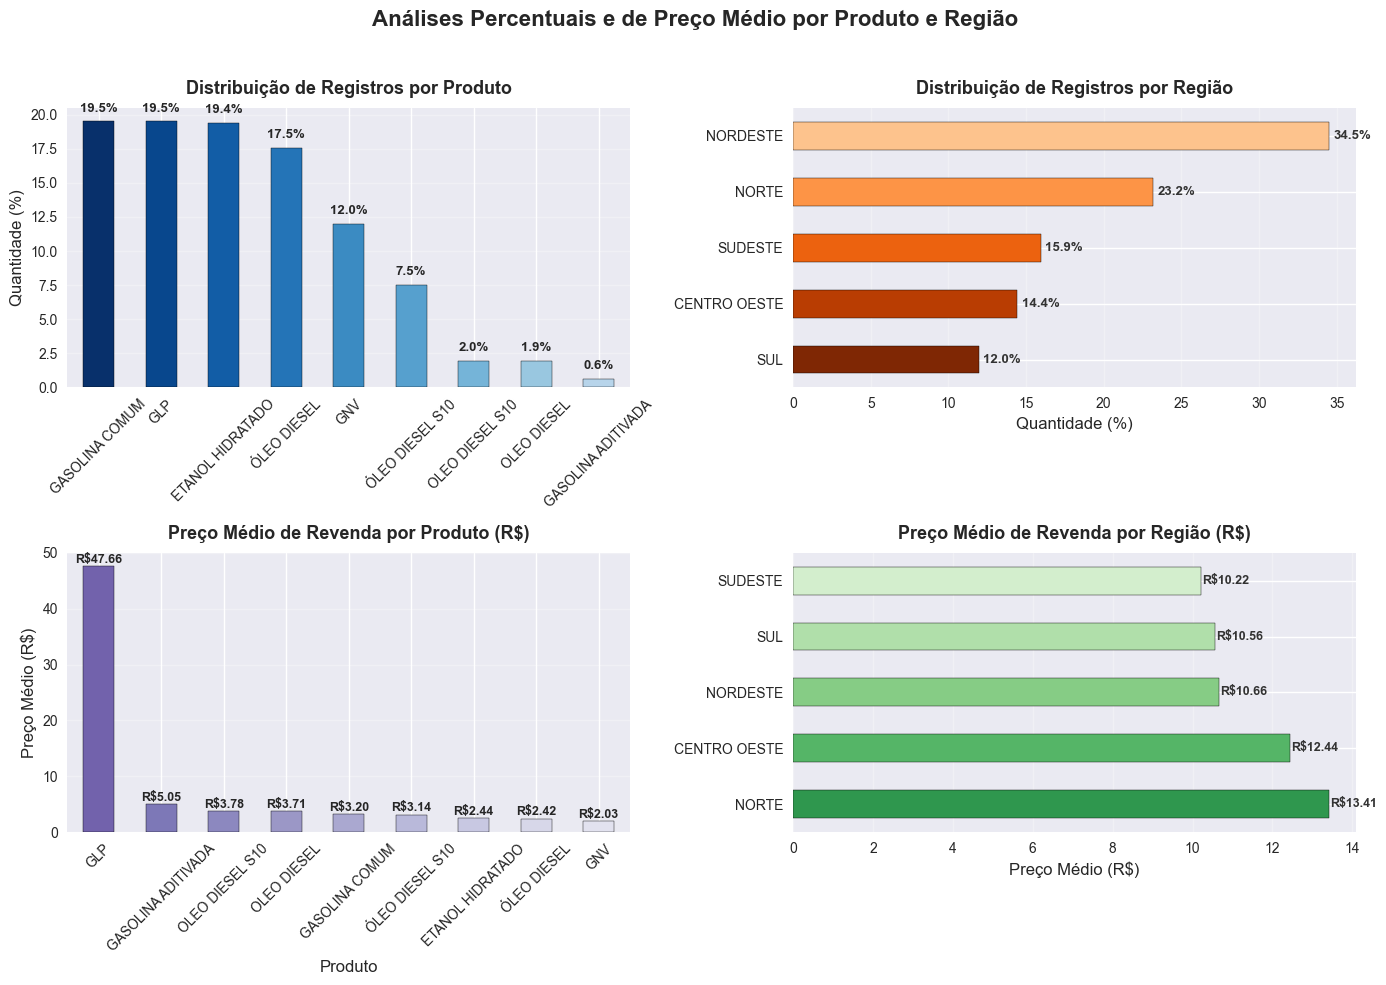

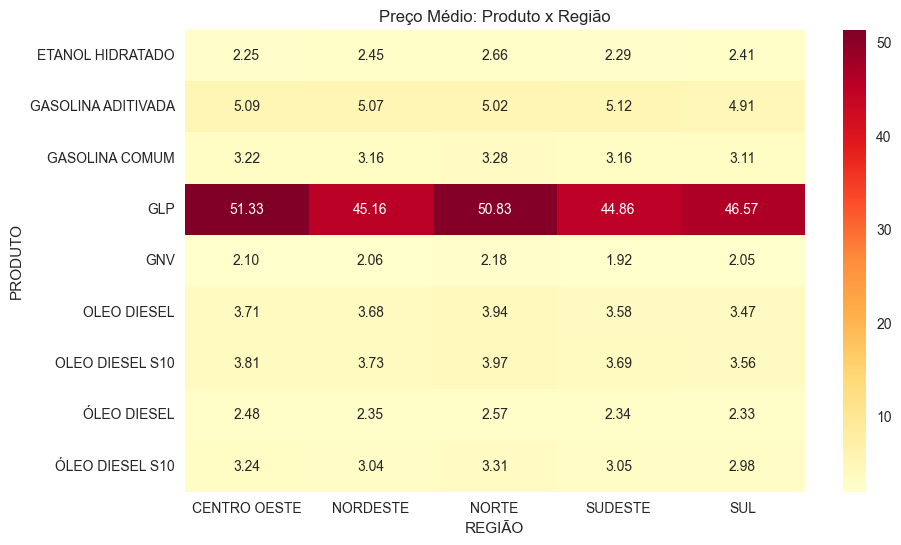

In [71]:

#Grafico de porcentagens de produtos mais destribuidos e de regioes

# ======== CÁLCULOS ========
# Porcentagem de registros
porcentagem_produto = df['PRODUTO'].value_counts(normalize=True) * 100
porcentagem_regiao = df['REGIÃO'].value_counts(normalize=True) * 100
porcentagem_regiao = porcentagem_regiao.sort_values()
# Tabela cruzada (pivot table)
tabela_preco = df.pivot_table(
    values='PREÇO MÉDIO REVENDA',
    index='PRODUTO',
    columns='REGIÃO',
    aggfunc='mean'
)

# Preços médios
preco_produto = df.groupby('PRODUTO')['PREÇO MÉDIO REVENDA'].mean().sort_values(ascending=False)
preco_regiao = df.groupby('REGIÃO')['PREÇO MÉDIO REVENDA'].mean().sort_values(ascending=False)

# ======== ESTILO ========
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle('Análises Percentuais e de Preço Médio por Produto e Região',
             fontsize=16, fontweight='bold', y=0.98)

# Paletas de cores
cores_produto = plt.cm.Blues(np.linspace(1, 0.3, len(porcentagem_produto)))
cores_regiao = plt.cm.Oranges(np.linspace(1, 0.3, len(porcentagem_regiao)))
cores_preco_produto = plt.cm.Purples(np.linspace(0.7, 0.2, len(preco_produto)))
cores_preco_regiao = plt.cm.Greens(np.linspace(0.7, 0.2, len(preco_regiao)))


# ======== GRÁFICO 1: Distribuição por Produto ========
porcentagem_produto.plot(kind='bar', color=cores_produto, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Registros por Produto', fontsize=13, fontweight='bold', pad=10)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Quantidade (%)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

for p in axes[0, 0].patches:
    axes[0, 0].text(p.get_x() + p.get_width()/2, p.get_height() + 0.5,
                    f'{p.get_height():.1f}%', ha='center', va='bottom', fontsize=9.5, fontweight='bold')

axes[0, 0].spines[['right', 'top']].set_visible(False)
axes[0, 0].grid(alpha=0.3, axis='y')


# ======== GRÁFICO 2: Distribuição por Região ========
porcentagem_regiao.plot(kind='barh', color=cores_regiao, edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Registros por Região', fontsize=13, fontweight='bold', pad=10)
axes[0, 1].set_xlabel('Quantidade (%)', fontsize=12)
axes[0, 1].set_ylabel('')

for p in axes[0, 1].patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    axes[0, 1].text(width + 0.3, y, f'{width:.1f}%', ha='left', va='center',
                    fontsize=9.5, fontweight='bold', color='#333333')

axes[0, 1].spines[['right', 'top']].set_visible(False)
axes[0, 1].grid(alpha=0.3, axis='x')


# ======== GRÁFICO 3: Preço Médio por Produto ========
preco_produto.plot(kind='bar', color=cores_preco_produto, edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Preço Médio de Revenda por Produto (R$)', fontsize=13, fontweight='bold', pad=10)
axes[1, 0].set_xlabel('Produto', fontsize=12)
axes[1, 0].set_ylabel('Preço Médio (R$)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

for p in axes[1, 0].patches:
    axes[1, 0].text(p.get_x() + p.get_width()/2, p.get_height() + 0.02,
                    f'R${p.get_height():.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[1, 0].spines[['right', 'top']].set_visible(False)
axes[1, 0].grid(alpha=0.3, axis='y')


# ======== GRÁFICO 4: Preço Médio por Região ========
preco_regiao.plot(kind='barh', color=cores_preco_regiao, edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Preço Médio de Revenda por Região (R$)', fontsize=13, fontweight='bold', pad=10)
axes[1, 1].set_xlabel('Preço Médio (R$)', fontsize=12)
axes[1, 1].set_ylabel('')

for p in axes[1, 1].patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    axes[1, 1].text(width + 0.03, y, f'R${width:.2f}', ha='left', va='center',
                    fontsize=9, fontweight='bold', color='#333333')

axes[1, 1].spines[['right', 'top']].set_visible(False)
axes[1, 1].grid(alpha=0.3, axis='x')

# ======== AJUSTES FINAIS ========
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



# Visualizar com heatmap


plt.figure(figsize=(10, 6))
sns.heatmap(tabela_preco, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Preço Médio: Produto x Região')
plt.show()


In [ ]:
# ======== ESTILO ========
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
plt.suptitle('Análises Percentuais e de Preço Médio por Produto e Região',
             fontsize=16, fontweight='bold', y=0.98)

# Paletas de cores
cores_produto = plt.cm.Blues(np.linspace(1, 0.3, len(porcentagem_produto)))
cores_regiao = plt.cm.Oranges(np.linspace(1, 0.3, len(porcentagem_regiao)))
cores_preco_produto = plt.cm.Purples(np.linspace(0.7, 0.2, len(preco_produto)))
cores_preco_regiao = plt.cm.Greens(np.linspace(0.7, 0.2, len(preco_regiao)))


# ======== GRÁFICO 1: Distribuição por Produto ========
porcentagem_produto.plot(kind='bar', color=cores_produto, edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Registros por Produto', fontsize=13, fontweight='bold', pad=10)
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('Quantidade (%)', fontsize=12)
axes[0, 0].tick_params(axis='x', rotation=45)

for p in axes[0, 0].patches:
    axes[0, 0].text(p.get_x() + p.get_width()/2, p.get_height() + 0.5,
                    f'{p.get_height():.1f}%', ha='center', va='bottom', fontsize=9.5, fontweight='bold')

axes[0, 0].spines[['right', 'top']].set_visible(False)
axes[0, 0].grid(alpha=0.3, axis='y')


# ======== GRÁFICO 2: Distribuição por Região ========
porcentagem_regiao.plot(kind='barh', color=cores_regiao, edgecolor='black', ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Registros por Região', fontsize=13, fontweight='bold', pad=10)
axes[0, 1].set_xlabel('Quantidade (%)', fontsize=12)
axes[0, 1].set_ylabel('')

for p in axes[0, 1].patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    axes[0, 1].text(width + 0.3, y, f'{width:.1f}%', ha='left', va='center',
                    fontsize=9.5, fontweight='bold', color='#333333')

axes[0, 1].spines[['right', 'top']].set_visible(False)
axes[0, 1].grid(alpha=0.3, axis='x')


# ======== GRÁFICO 3: Preço Médio por Produto ========
preco_produto.plot(kind='bar', color=cores_preco_produto, edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_title('Preço Médio de Revenda por Produto (R$)', fontsize=13, fontweight='bold', pad=10)
axes[1, 0].set_xlabel('Produto', fontsize=12)
axes[1, 0].set_ylabel('Preço Médio (R$)', fontsize=12)
axes[1, 0].tick_params(axis='x', rotation=45)

for p in axes[1, 0].patches:
    axes[1, 0].text(p.get_x() + p.get_width()/2, p.get_height() + 0.02,
                    f'R${p.get_height():.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[1, 0].spines[['right', 'top']].set_visible(False)
axes[1, 0].grid(alpha=0.3, axis='y')


# ======== GRÁFICO 4: Preço Médio por Região ========
preco_regiao.plot(kind='barh', color=cores_preco_regiao, edgecolor='black', ax=axes[1, 1])
axes[1, 1].set_title('Preço Médio de Revenda por Região (R$)', fontsize=13, fontweight='bold', pad=10)
axes[1, 1].set_xlabel('Preço Médio (R$)', fontsize=12)
axes[1, 1].set_ylabel('')

for p in axes[1, 1].patches:
    width = p.get_width()
    y = p.get_y() + p.get_height()/2
    axes[1, 1].text(width + 0.03, y, f'R${width:.2f}', ha='left', va='center',
                    fontsize=9, fontweight='bold', color='#333333')

axes[1, 1].spines[['right', 'top']].set_visible(False)
axes[1, 1].grid(alpha=0.3, axis='x')

# ======== AJUSTES FINAIS ========
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()



# Visualizar com heatmap


plt.figure(figsize=(10, 6))
sns.heatmap(tabela_preco, annot=True, fmt='.2f', cmap='YlOrRd')
plt.title('Preço Médio: Produto x Região')
plt.show()
